In [1]:
import requests
import json

from datetime import date 
from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt

from server.functions import WikiAPI

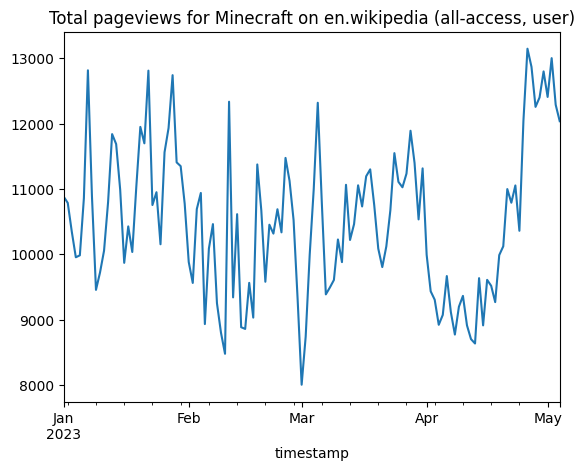

In [2]:
data = WikiAPI.pageviews("Minecraft", start=date(2023,1,1))
df = pd.DataFrame(data)
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")
df = df.set_index("timestamp")
df["views"].plot()
plt.title(f"Total pageviews for {data[0]['article']} on {data[0]['project']} ({data[0]['access']}, {data[0]['agent']})")
plt.show()

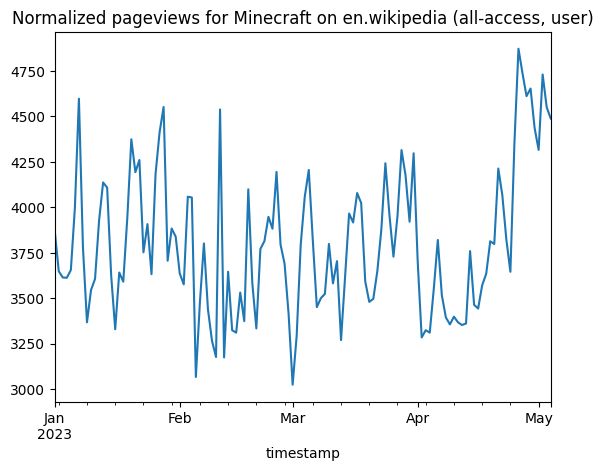

In [4]:
data = WikiAPI.normalized_views("Minecraft", start=date(2023,1,1))
df = pd.DataFrame(data)
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")
df = df.set_index("timestamp")
df["views"].plot()
plt.title(f"Normalized pageviews for {data[0]['article']} on {data[0]['project']} ({data[0]['access']}, {data[0]['agent']})")
plt.show()

In [ ]:
data = WikiAPI.top_articles(timespan="month")
print(f"Top articles on {data['project']} on {data['month']}/{data['day']}/{data['year']} ({data['access']})")
for a in data["articles"]:
    print(f"{a['rank']}: {a['article']} ({a['views']} views)")

In [6]:
# Finding the average projectviews to set an average value
data = WikiAPI.projectviews(start=date(2023,1,1), access="all-access")
mean_views = sum([d["views"] for d in data]) / len(data)
print(f"Average pageviews for {data[0]['project']} ({data[0]['access']}, {data[0]['agent']}): {mean_views:.2f}")

Average pageviews for en.wikipedia (all-access, user): 249115652.14


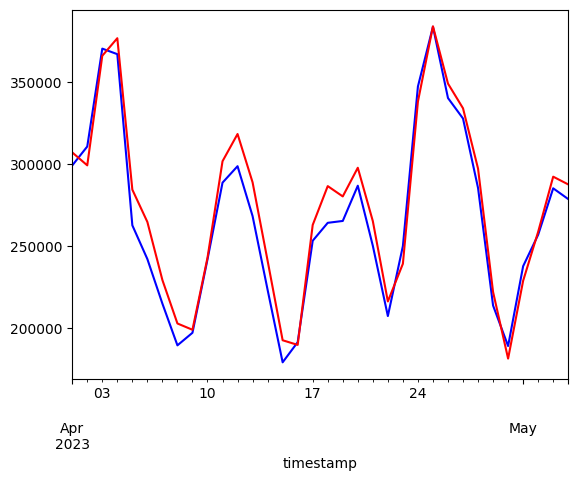

In [4]:
ARTICLE_NAME = "ChatGPT"

data_raw = WikiAPI.pageviews(ARTICLE_NAME, start=date(2023,4,1))
df = pd.DataFrame(data_raw)

data_norm = WikiAPI.normalized_views(ARTICLE_NAME, start=date(2023,4,1))
df["norm_views"] = [d["views"] for d in data_norm]

df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")
df = df.set_index("timestamp")

df["views"].plot(color="blue")
df["norm_views"].plot(color="red")
plt.show()

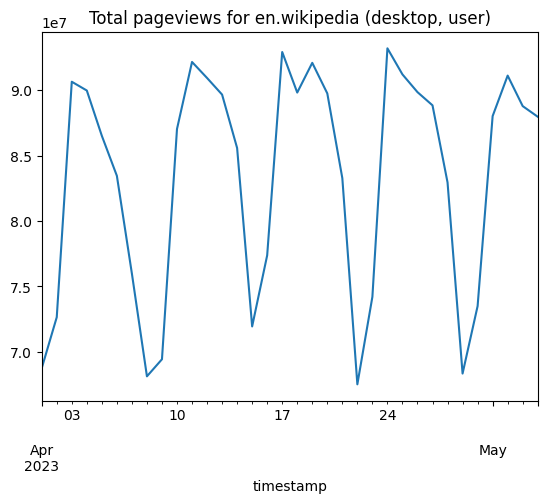

In [7]:
data = WikiAPI.projectviews(start=date(2023,4,1), access="desktop")
df = pd.DataFrame(data)
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")
df = df.set_index("timestamp")
df["views"].plot()
plt.title(f"Total pageviews for {data[0]['project']} ({data[0]['access']}, {data[0]['agent']})")
plt.show()

In [2]:
# testing summary
WikiAPI.article_summary("ChatGPT")

'AI chatbot developed by OpenAI'